# Imports

In [21]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import squareform
from sklearn.manifold import TSNE, MDS
from sklearn.decomposition import PCA

from tsne_modifications.dataset_generations import synthesize
from tsne_modifications.jedi import JEDI
from tsne_modifications.metrics.metrics import evaluate_embedding, local_reconstruction_correlation
from tsne_modifications.dtsne import DTSNE

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

## Creation of Synthetic datasets

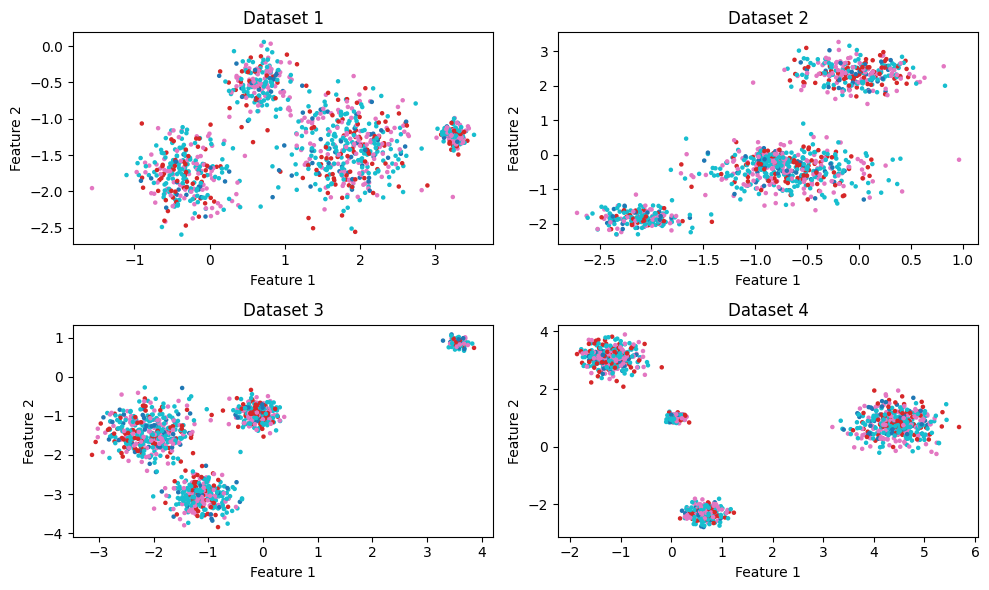

In [3]:

size = 1000
X_1, y_1 = synthesize(size, 1)
X_2, y_2 = synthesize(size, 2)
X_3, y_3 = synthesize(size, 3)
X_4, y_4 = synthesize(size, 4)

# Plot the datasets on different subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))
axs = axs.flatten()

for i, (X, y) in enumerate([(X_1, y_1), (X_2, y_2), (X_3, y_3), (X_4, y_4)]):
    ax = axs[i]
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='tab10', s=5)
    ax.set_title(f'Dataset {i+1}')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

# JEDI Experiments

In [4]:
def get_distance_matrix(array):
    X = np.zeros((array.shape[0], array.shape[0]))
    for i in range(array.shape[0]):
        for j in range(array.shape[0]):
            X[i][j] = np.sqrt(np.sum((array[i] - array[j]) ** 2))
    return X

In [7]:
def run_experiment_jedi(X, y, perplexity=30.0, early_exaggeration=12.0, learning_rate="auto",
                    n_iter=1000, n_iter_without_progress=300, min_grad_norm=1e-7,
                    alpha=0.5, beta=0.5, verbose=0, random_state=None):
    
    P_prior = squareform(get_distance_matrix(X[:, :8]))
    X = get_distance_matrix(X)
    model = JEDI(perplexity=perplexity, early_exaggeration=early_exaggeration, 
                 learning_rate=learning_rate, n_iter=n_iter, 
                 n_iter_without_progress=n_iter_without_progress, 
                 min_grad_norm=min_grad_norm, alpha=alpha, beta=beta, verbose=verbose, 
                 random_state=random_state)
    
    embedding = model.fit_transform(X, P_prior)
    
    return embedding, y

<function matplotlib.pyplot.show(close=None, block=None)>

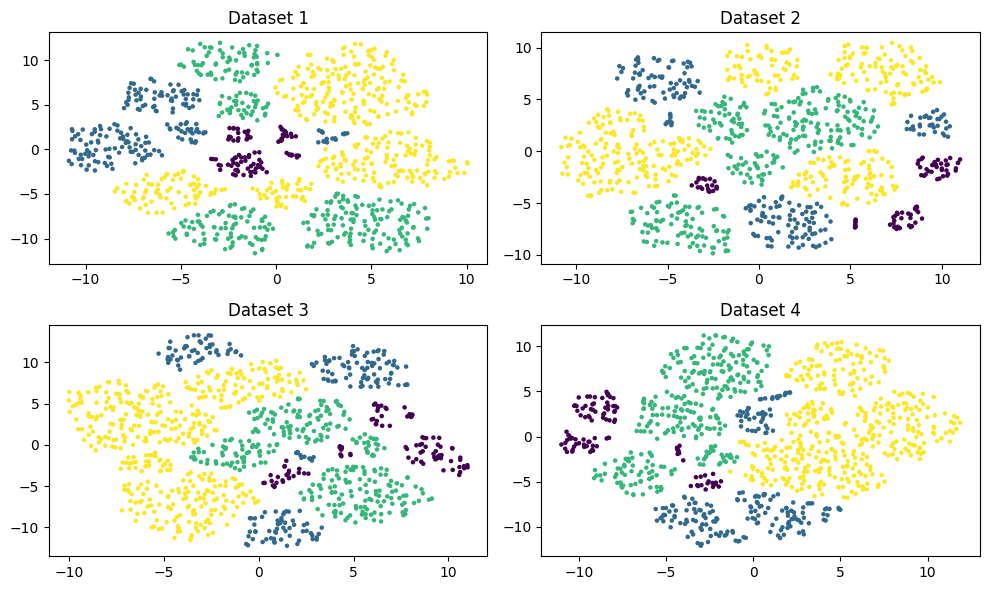

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(10, 6))
for i, (X, y) in enumerate([(X_1, y_1), (X_2, y_2), (X_3, y_3), (X_4, y_4)]):
    embedding, y = run_experiment_jedi(X, y)
    row = i // 2
    col = i % 2
    axs[row, col].scatter(embedding[:, 0], embedding[:, 1], c=y, s=5)
    axs[row, col].set_title(f"Dataset {i+1}")
    
plt.tight_layout()
plt.show()

# dtSNE Experiments

In [16]:
def run_experiment_dtsne(X, y, perplexity=100, n_jobs=-1, verbose=0):
    model = DTSNE(perplexity=perplexity, n_jobs=n_jobs, verbose=verbose)
    embedding = model.fit_transform(X)

    return embedding, y

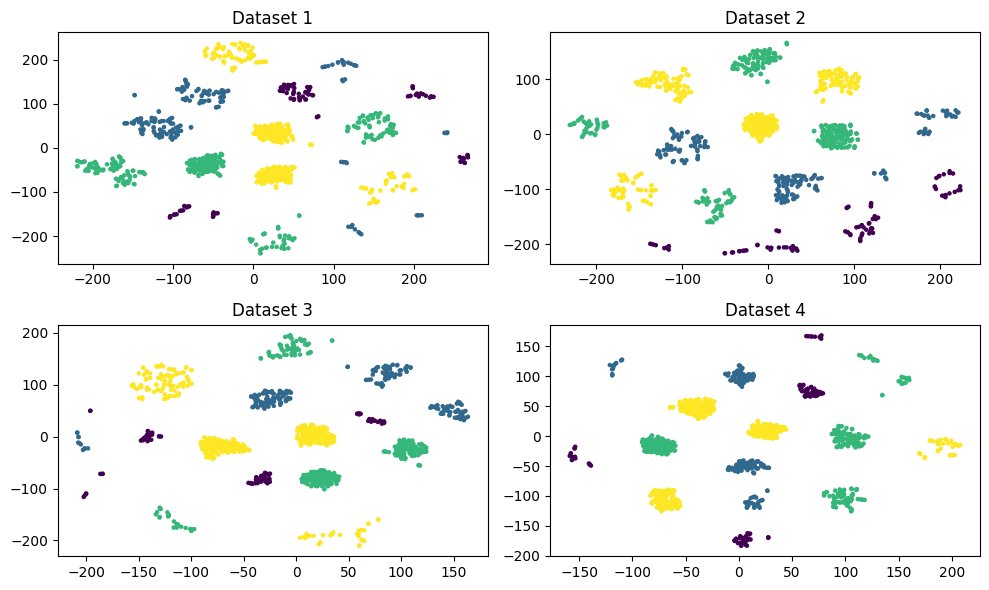

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(10, 6))
for i, (X, y) in enumerate([(X_1, y_1), (X_2, y_2), (X_3, y_3), (X_4, y_4)]):
    embedding, y = run_experiment_dtsne(X, y)
    row = i // 2
    col = i % 2
    axs[row, col].scatter(embedding[:, 0], embedding[:, 1], c=y, s=5)
    axs[row, col].set_title(f"Dataset {i+1}")
    
plt.tight_layout()
plt.show()

## Baseline Experiments

In [22]:
def run_experiment(X):
    # t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    tsne_embedding = tsne.fit_transform(X)
    
    # PCA
    pca = PCA(n_components=2)
    pca_embedding = pca.fit_transform(X)
    
    # MDS
    mds = MDS(n_components=2, random_state=42)
    mds_embedding = mds.fit_transform(X)
    
    embeddings = {
        't-SNE': tsne_embedding,
        'PCA': pca_embedding,
        'MDS': mds_embedding,
    }
    
    return embeddings

C:\Users\makci\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\makci\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\makci\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning,

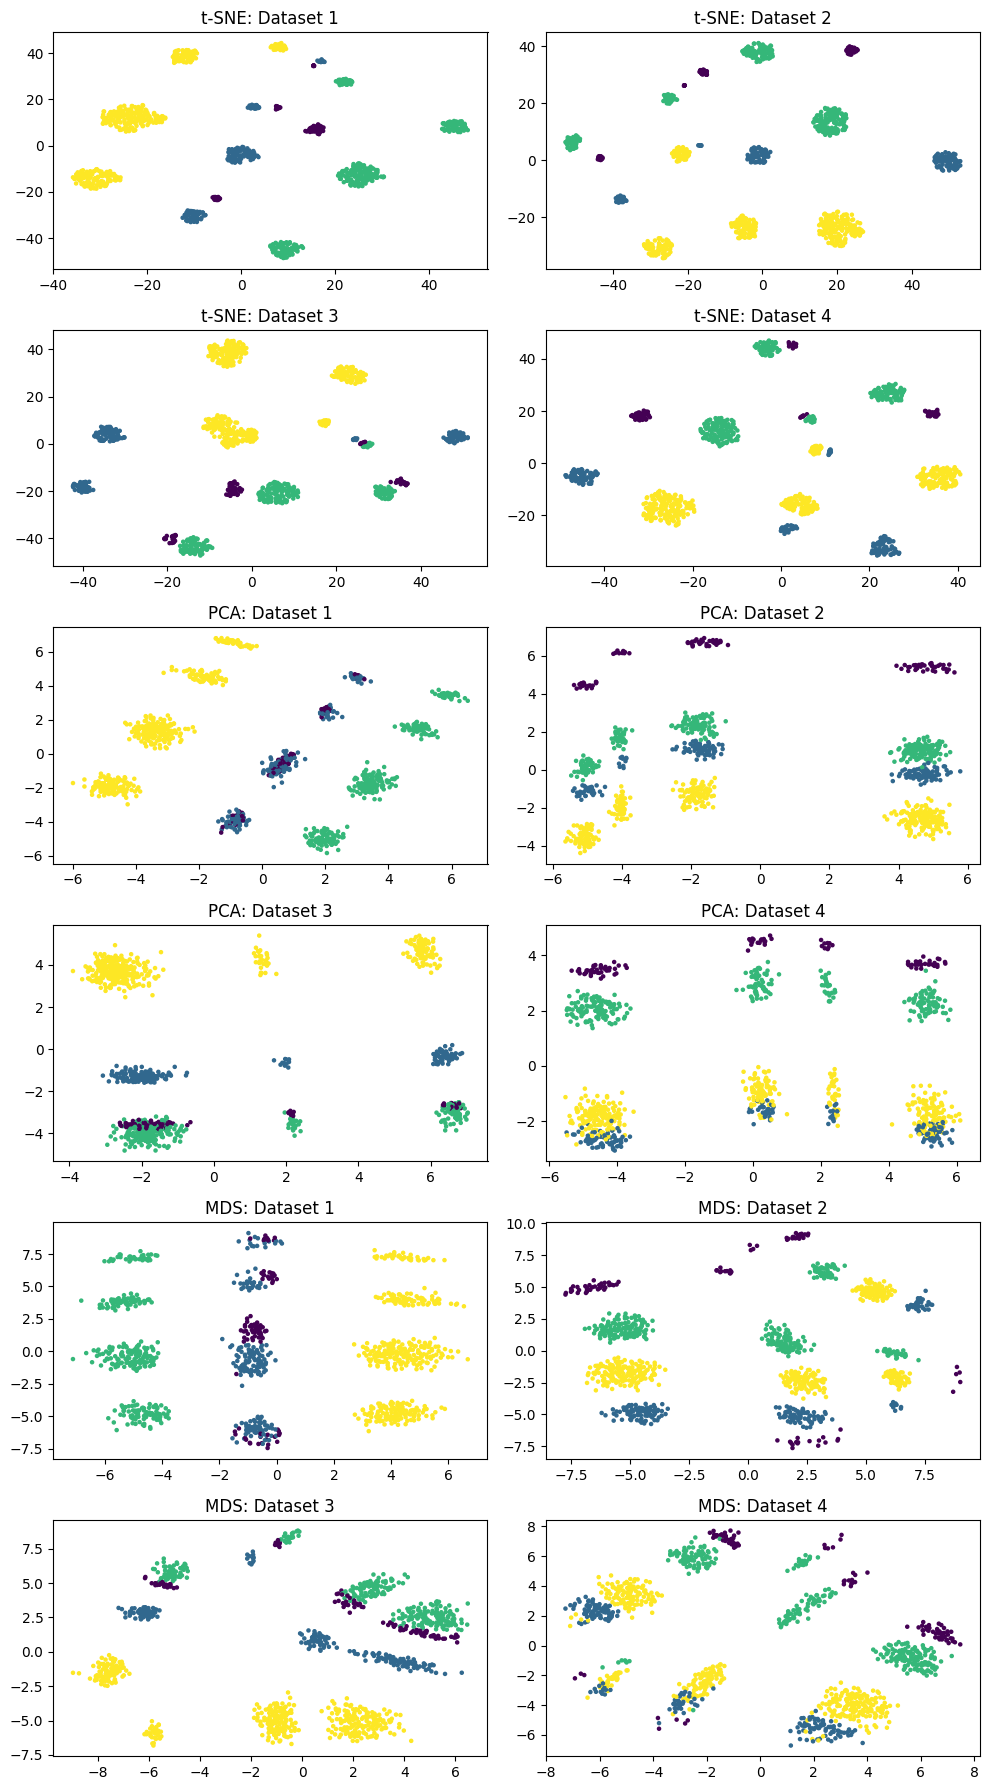

In [31]:
fig, axs = plt.subplots(2 * 3, 2, figsize=(10, 18))
for i, (X, y) in enumerate([(X_1, y_1), (X_2, y_2), (X_3, y_3), (X_4, y_4)]):
    embeddings = run_experiment(X)
    for j, keyval in enumerate(embeddings.items()):
        key, val = keyval
        row = i // 2 + j * 2
        col = i % 2
        axs[row, col].scatter(val[:, 0], val[:, 1], c=y, s=5)
        axs[row, col].set_title(f"{key}: Dataset {i+1}")
    
plt.tight_layout()
plt.show()